In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install rouge -qU
!pip install mlflow -qU

In [3]:
from rouge import Rouge 

import warnings
warnings.filterwarnings(action="ignore")

import nltk
from nltk.corpus import stopwords
 

pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.options.mode.chained_assignment = None  # default='warn'

palette="hsv"

In [4]:
# Goal of the Competition
# The goal of this competition is to assess the quality of summaries written by students in grades 3-12.
#You'll build a model that evaluates how well a student represents the main idea and details of a source text,
#as well as the clarity, precision, and fluency of the language used in the summary. 
#You'll have access to a collection of real student summaries to train your model.

# Your work will assist teachers in evaluating the quality of student work and also help learning platforms provide immediate feedback to students.

# Dataset Description
# The dataset comprises about 24,000 summaries written by students in grades 3-12 of passages 
#on a variety of topics and genres. These summaries have been assigned scores for both content and wording. 
#The goal of the competition is to predict content and wording scores for summaries on unseen topics.

#File and Field Information

# summaries:

# student_id - The ID of the student writer.
# prompt_id - The ID of the prompt which links to the prompt file.
# text - The full text of the student's summary.
# content - The content score for the summary. The first targe.
# wording - The wording score for the summary. The second target
# prompts:

# prompt_id - The ID of the prompt which links to the summaries file.
# prompt_question - The specific question the students are asked to respond to
# prompt_title - A short-hand title for the prompt
# prompt_text - The full prompt text

In [5]:
#https://www.kaggle.com/code/ecopolitics16/students-abalyzing-eda

In [6]:
# Read files
prompts_train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv")
prompts_test = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv")
summaries_train = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv")
summaries_test = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv")
sample_submission = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv")
print(f"Prompts train: {prompts_train.shape}")
print(f"Prompts test: {prompts_test.shape}")
print(f"Summaries train: {summaries_train.shape}")
print(f"Summaries test: {summaries_test.shape}")

Prompts train: (4, 4)
Prompts test: (2, 4)
Summaries train: (7165, 5)
Summaries test: (4, 3)


In [7]:
# Prompts
pd.options.display.max_colwidth = 1000 # display the whole text of prompts
prompts_train.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,"Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.",On Tragedy,"Chapter 13 \r\nAs the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. \r\nA perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind woul..."
1,3b9047,"In complete sentences, summarize the structure of the ancient Egyptian system of government. How were different social classes involved in this government? Cite evidence from the text.",Egyptian Social Structure,"Egyptian society was structured like a pyramid. At the top were the gods, such as Ra, Osiris, and Isis. Egyptians believed that the gods controlled the universe. Therefore, it was important to keep them happy. They could make the Nile overflow, cause famine, or even bring death. \r\nThe Egyptians also elevated some human beings to gods. Their leaders, called pharaohs, were believed to be gods in human form. They had absolute power over their subjects. After pharaohs died, huge stone pyramids were built as their tombs. Pharaohs were buried in chambers within the pyramids. \r\nBecause the people of Egypt believed that their pharaohs were gods, they entrusted their rulers with many responsibilities. Protection was at the top of the list. The pharaoh directed the army in case of a foreign threat or an internal conflict. All laws were enacted at the discretion of the pharaoh. Each farmer paid taxes in the form of grains, which were stored in the pharaoh’s warehouses. This grain was used..."
2,814d6b,Summarize how the Third Wave developed over such a short period of time and why the experiment was ended.,The Third Wave,"Background \r\nThe Third Wave experiment took place at Cubberley High School in Palo Alto, California during the first week of April 1967. History teacher Ron Jones, finding himself unable to explain to his students how people throughout history followed the crowd even when terrible things were happening, decided to demonstrate it to his students through an experiment. Jones announced that he was starting a movement aimed to eliminate democracy. Jones named the movement “The Third Wave” as a symbol of strength, referring to the mythical belief that the third in a series of waves is the strongest. One of the central points of this movement was that democracy’s main weakness is that it favors the individual over the whole community. Jones emphasized this main point of the movement when he created this catchy motto: “Strength through discipline, strength through community, strength through action, strength through pride.” \r\nThe Experiment \r\nJones started the first day of the exper..."
3,ebad26,Summarize the various ways the factory would use or cover up spoiled meat. Cite evidence in your answer.,Excerpt from The Jungle,"With one member trimming beef in a cannery, and another working in a sausage factory, the family had a first-hand knowledge of the great majority of Packingtown swindles. For it was the custom, as they found, whenever meat was so spoiled that it could not be used for anything else, either to can it or else to chop it up into sausage. With what had b

In [8]:
# Summaries
summaries_train.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the smell go away and it wouldnt be a bad smell. Some of the meat would be tossed on the floor where there was sawdust spit of the workers and they would make the meat all over again with the things in it.,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and social classes involved in day-to-day living. In many instances if you were at the bottom of the social ladder you could climb up, you didn't have to stay a peasant you could work to bring your status up. Everyone worshipped the gods Ra, Osiris, and Isis, but also they would worship their pharaohs like gods as well. Under the pharaohs were the priests, they had the responsibility to entertain or please the said god. The Chain of Command was placed to keep everyone in check, not one person could handle all the civilians and treasures without any aid. Like the tax collector, called a vizier like stated they were in charge of collecting the peoples' tax. They were also one of the rare instances who were able to read and write, that's how they were granted ""vizier"" Also the soldiers did many things as they would fight in wars or ""quelled domestic uprisings"". They were in charge of getting the slaves, farmers, and peasants to build palaces or th...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people were gods.Then the 2nd highest class was a gonvener.Chiefs minister were called a vizier as a supervisor. (par.6),-0.210614,-0.471415
4,0070c9e7af47,814d6b,"The Third Wave developed rapidly because the students genuinly believed that it was the best course of action. Their grades, acomplishments, and classparticipation/ behavior had improved dramatically since the experiment began. There did not seem to be any consiquenses in the students eyes. They became extremely engaged in all the Third Wave activites both inside and outside tha classroom. The experiment ended because the students were so patriotic about the ""movement"". The history class of thirty rapidly grew to 200 in three days. That means 170 students joined a school ""movement"" in two days. Thats 85 people per day! On the fifth and final day all the students had completley believed that the ""Third Wave"" was a movement that would expell democracy. They believed a candidate from the ""movement"" would anounce its existance on television after five days of its success. The creater, Ron Jones, believed it had gone too far and for everyone's safety he shut it down. If he hadn't the...",3.272894,3.219757


In [9]:
#How many students?
len(summaries_train['student_id'].unique())

7165

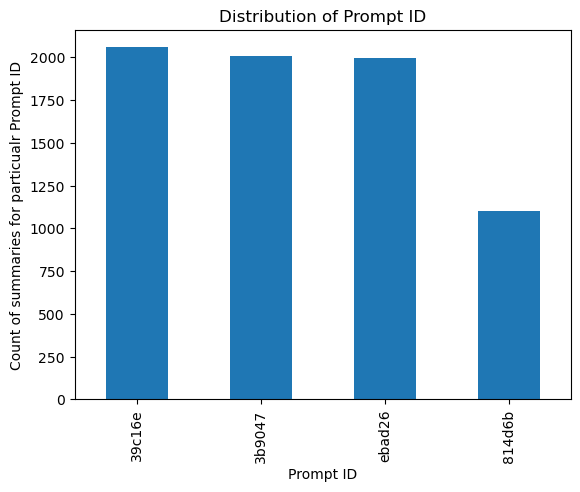

In [10]:
#Distribution of each Prompt ID
#We can observe unequal distribution of prompt examples.
plt.title("Distribution of Prompt ID")
plt.xlabel("Prompt ID")
plt.ylabel("Count of summaries for particualr Prompt ID")
summaries_train.prompt_id.value_counts().plot(kind="bar");

In [11]:
# There are 4 diffrent prompts for students to deal with:

# On Tragedy
# Egyptian Social Structure
# The Third Wave
# Excerpt from The Jungle

In [12]:
prompts_df = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv")
prompts_mapping = (prompts_df.set_index(["prompt_id"])["prompt_title"]).to_dict()
prompts_df.set_index("prompt_id", inplace=True)
prompts_df

,prompt_question,prompt_title,prompt_text
prompt_id,,,
39c16e,"Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.",On Tragedy,"Chapter 13 \r\nAs the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. \r\nA perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should the downfall of the utter villain be exhibited. A plot of this kind woul..."
3b9047,"In complete sentences, summarize the structure of the ancient Egyptian system of government. How were different social classes involved in this government? Cite evidence from the text.",Egyptian Social Structure,"Egyptian society was structured like a pyramid. At the top were the gods, such as Ra, Osiris, and Isis. Egyptians believed that the gods controlled the universe. Therefore, it was important to keep them happy. They could make the Nile overflow, cause famine, or even bring death. \r\nThe Egyptians also elevated some human beings to gods. Their leaders, called pharaohs, were believed to be gods in human form. They had absolute power over their subjects. After pharaohs died, huge stone pyramids were built as their tombs. Pharaohs were buried in chambers within the pyramids. \r\nBecause the people of Egypt believed that their pharaohs were gods, they entrusted their rulers with many responsibilities. Protection was at the top of the list. The pharaoh directed the army in case of a foreign threat or an internal conflict. All laws were enacted at the discretion of the pharaoh. Each farmer paid taxes in the form of grains, which were stored in the pharaoh’s warehouses. This grain was used..."
814d6b,Summarize how the Third Wave developed over such a short period of time and why the experiment was ended.,The Third Wave,"Background \r\nThe Third Wave experiment took place at Cubberley High School in Palo Alto, California during the first week of April 1967. History teacher Ron Jones, finding himself unable to explain to his students how people throughout history followed the crowd even when terrible things were happening, decided to demonstrate it to his students through an experiment. Jones announced that he was starting a movement aimed to eliminate democracy. Jones named the movement “The Third Wave” as a symbol of strength, referring to the mythical belief that the third in a series of waves is the strongest. One of the central points of this movement was that democracy’s main weakness is that it favors the individual over the whole community. Jones emphasized this main point of the movement when he created this catchy motto: “Strength through discipline, strength through community, strength through action, strength through pride.” \r\nThe Experiment \r\nJones started the first day of the exper..."
ebad26,Summarize the various ways the factory would use or cover up spoiled meat. Cite evidence in your answer.,Excerpt from The Jungle,"With one member trimming beef in a cannery, and another working in a sausage factory, the family had a first-hand knowledge of the great majority of Packingtown swindles. For it was the custom, as they found, whenever meat was so spoiled that it could not be used for anything else, either to can it or else to chop it up into sausage. With what had been t

In [13]:
summaries_df = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv")
summaries_df["prompt_title"] = summaries_df["prompt_id"].map(prompts_mapping)
summaries_df.head()

,student_id,prompt_id,text,content,wording,prompt_title
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how people reacted to a new one leader government. It gained popularity as people wanted to try new things. The students follow anything that is said and start turning on eachother to gain higher power. They had to stop the experement as too many people got to radical with it blindly following there leader,0.205683,0.380538,The Third Wave
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the smell go away and it wouldnt be a bad smell. Some of the meat would be tossed on the floor where there was sawdust spit of the workers and they would make the meat all over again with the things in it.,-0.548304,0.506755,Excerpt from The Jungle
2,004e978e639e,3b9047,"In Egypt, there were many occupations and social classes involved in day-to-day living. In many instances if you were at the bottom of the social ladder you could climb up, you didn't have to stay a peasant you could work to bring your status up. Everyone worshipped the gods Ra, Osiris, and Isis, but also they would worship their pharaohs like gods as well. Under the pharaohs were the priests, they had the responsibility to entertain or please the said god. The Chain of Command was placed to keep everyone in check, not one person could handle all the civilians and treasures without any aid. Like the tax collector, called a vizier like stated they were in charge of collecting the peoples' tax. They were also one of the rare instances who were able to read and write, that's how they were granted ""vizier"" Also the soldiers did many things as they would fight in wars or ""quelled domestic uprisings"". They were in charge of getting the slaves, farmers, and peasants to build palaces or th...",3.128928,4.231226,Egyptian Social Structure
3,005ab0199905,3b9047,The highest class was Pharaohs these people were gods.Then the 2nd highest class was a gonvener.Chiefs minister were called a vizier as a supervisor. (par.6),-0.210614,-0.471415,Egyptian Social Structure
4,0070c9e7af47,814d6b,"The Third Wave developed rapidly because the students genuinly believed that it was the best course of action. Their grades, acomplishments, and classparticipation/ behavior had improved dramatically since the experiment began. There did not seem to be any consiquenses in the students eyes. They became extremely engaged in all the Third Wave activites both inside and outside tha classroom. The experiment ended because the students were so patriotic about the ""movement"". The history class of thirty rapidly grew to 200 in three days. That means 170 students joined a school ""movement"" in two days. Thats 85 people per day! On the fifth and final day all the students had completley believed that the ""Third Wave"" was a movement that would expell democracy. They believed a candidate from the ""movement"" would anounce its existance on television after five days of its success. The creater, Ron Jones, believed it had gone too far and for everyone's safety he shut it down. If he hadn't the...",3.272894,3.219757,The Third Wave


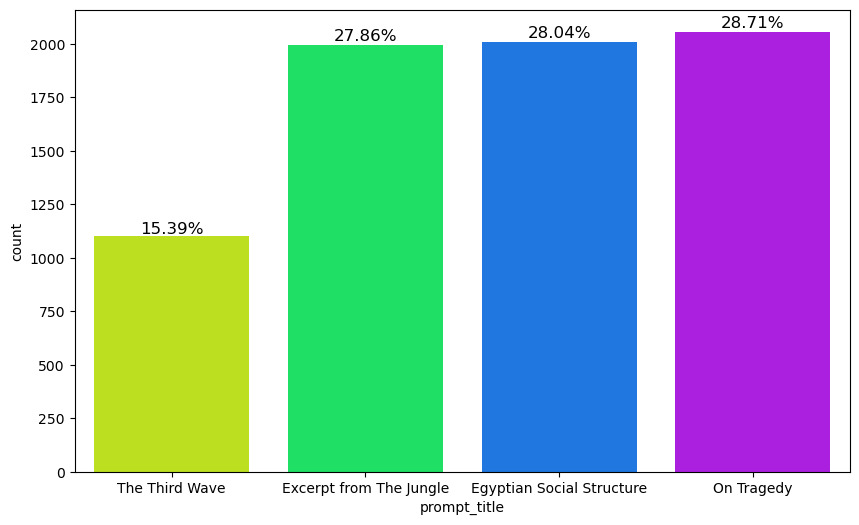

In [14]:
total=len(summaries_df)
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.countplot(x=summaries_df["prompt_title"], palette=palette, ax=ax)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() * 1.01
    ax.annotate(percentage, (x, y), ha='center', fontsize=12)

In [15]:
#Range of content score:
print(max(summaries_train.content), min(summaries_train.content))

3.90032610436019 -1.72985945253881


In [16]:
#Range of wording score:¶
print(max(summaries_train.wording), min(summaries_train.wording))

4.3106931513921 -1.96261379376134


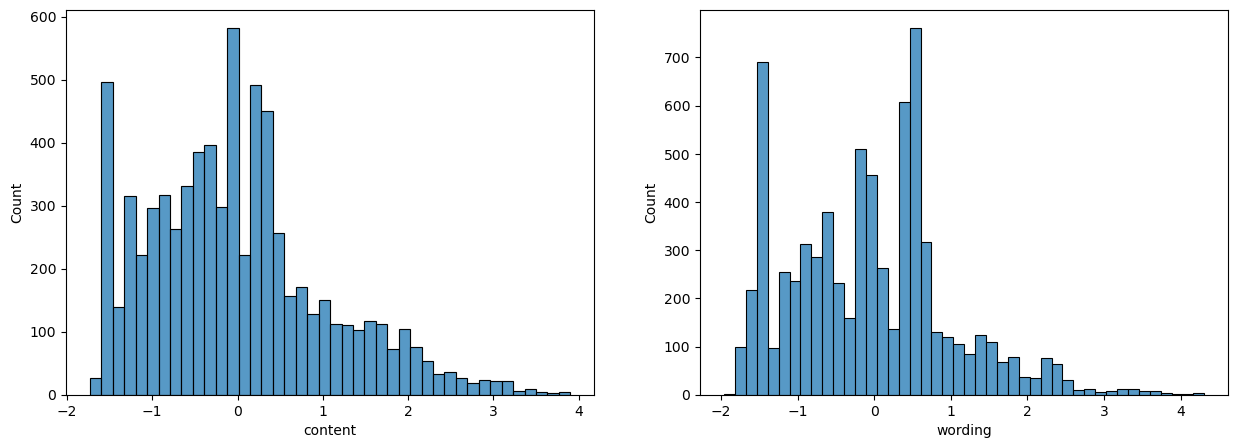

In [17]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=summaries_train, x='content')
plt.subplot(1, 2, 2)
sns.histplot(data=summaries_train, x='wording')
plt.show()

In [18]:
#Prompt Wordcloud
from wordcloud import WordCloud

def wordcloud(text, title):
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

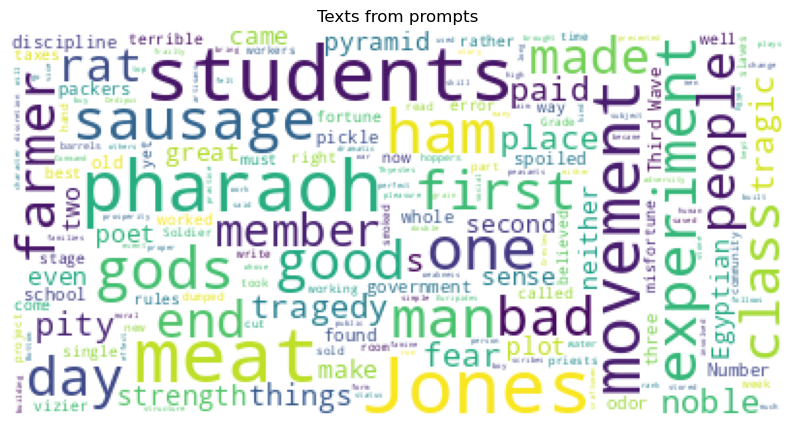

In [19]:
# join the text from training
prompt_content_text = ' '.join(prompts_train['prompt_text'])

wordcloud(prompt_content_text, "Texts from prompts")

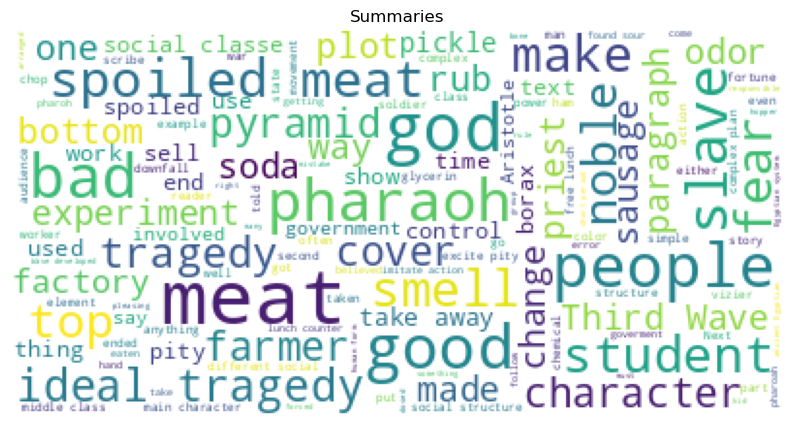

In [20]:
#Word cloud of content
content_text = ' '.join(summaries_train['text'])

wordcloud(content_text, "Summaries")

In [21]:
#We can observe similar words in prompts and summaries as expected such as god, pharaoh, bad, people, noble etc.

In [22]:
# Lets find common words between prompt and summary
# Wordcloud of a particular prompt id should contain most words from the prompt

# We can observe only 1k words repeating from prompt in summaries.

Number of words in prompt: 2714
Number of words in summary: 538491
Number of common words in prompt and summary: 1062



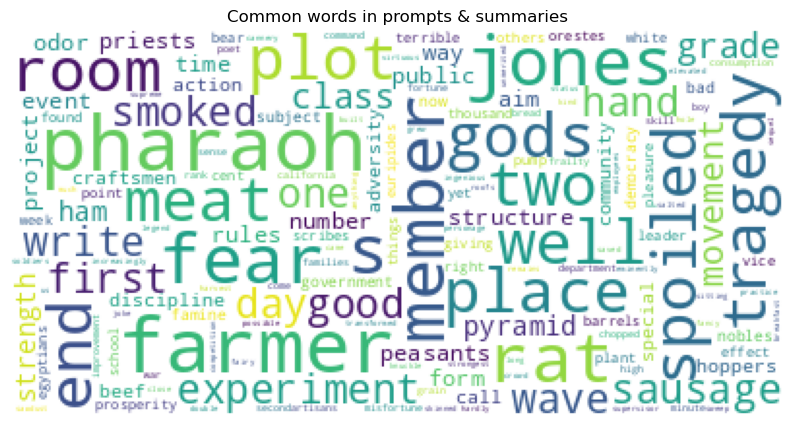

In [23]:
prompt_text = ''.join(prompts_train.prompt_text).lower().split(" ") # combine all words from the prompt text
prompt_summary_text = ''.join(summaries_train.text).lower().split(" ")
common_words = set(prompt_summary_text).intersection(set(prompt_text)) # Find all the common words between prompt and summary

print(f"Number of words in prompt: {len(prompt_text)}")
print(f"Number of words in summary: {len(prompt_summary_text)}")
print(f"Number of common words in prompt and summary: {len(common_words)}\n")

wordcloud(' '.join(common_words), "Common words in prompts & summaries")

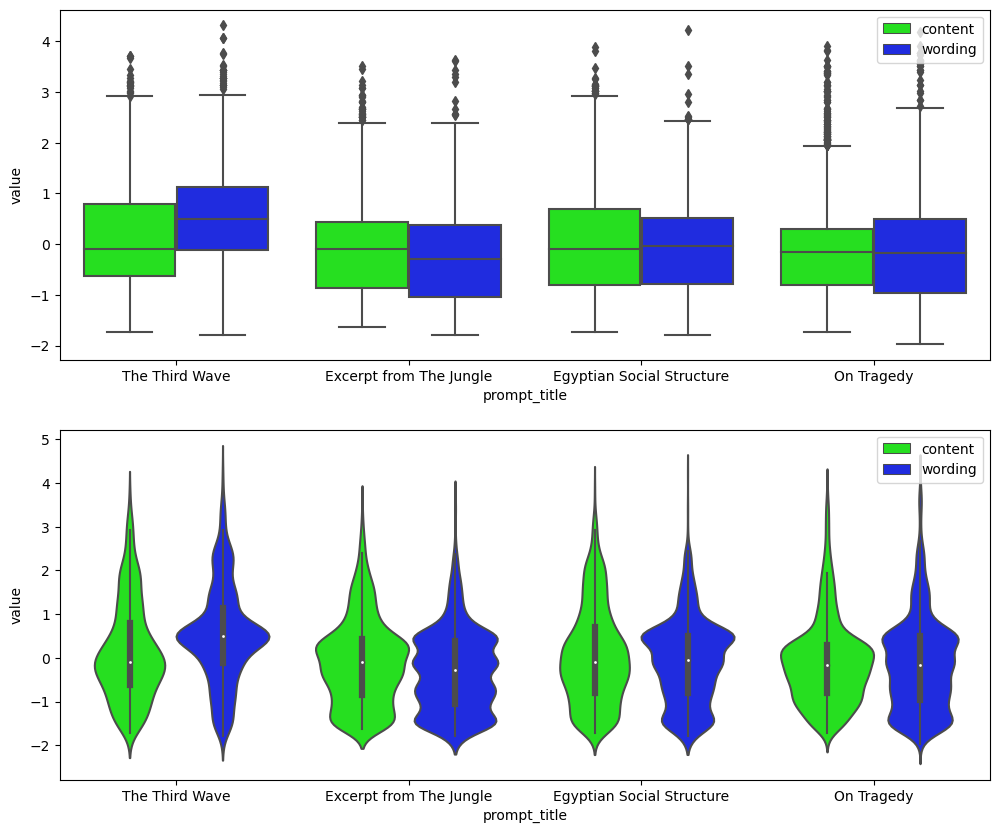

In [24]:
tmp_content = summaries_df[["content", "prompt_title"]]
tmp_content.loc[:, "type"] = "content"
tmp_content.rename(columns={"content": "value"}, inplace=True)
tmp_wording = summaries_df[["wording", "prompt_title"]]
tmp_wording.loc[:, "type"] = "wording"
tmp_wording.rename(columns={"wording": "value"}, inplace=True)
tmp = pd.concat([tmp_content, tmp_wording])

fig, axs = plt.subplots(2,1, figsize=(12,10))
sns.boxplot(data=tmp, x="prompt_title", y="value", hue="type", palette=palette, ax=axs[0])
sns.violinplot(data=tmp, x="prompt_title", y="value", hue="type", palette=palette, ax=axs[1])
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
fig.show()

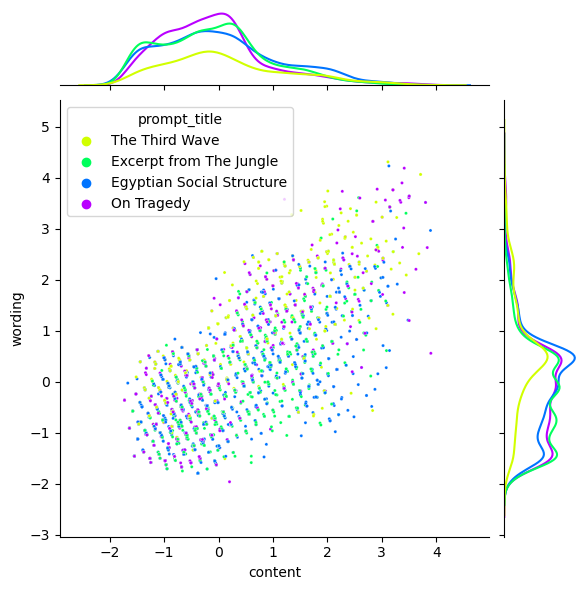

In [25]:
g = sns.jointplot(summaries_df, x="content", y="wording", hue="prompt_title", 
                  s=5, marginal_kws=dict(fill=False), palette=palette)

In [26]:
# There is a strong correlation between the content score and wording score that students receive for their summary. 
# Most of the students receive score between -1 and 1.
# The best students receive score above 2.5 (depends on task). 
# For prompts "Egyptian Social Structure" and "On Tragedy" 
# there is a significant gap between the best content and wording score.

In [27]:
#word statistics

In [28]:
summaries_df["n_sentences"] = summaries_df["text"].apply(lambda text: len(text.split(".")))
summaries_df["n_words"] = summaries_df["text"].apply(lambda text: len(text.split()))
summaries_df["av_words_per_sentence"] = round(summaries_df["n_words"] / summaries_df["n_sentences"], 2)

In [29]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

In [30]:
def remove_stop_words(text):
    filtered_words = [word for word in text.split() if word not in stopwords.words('english')]
    return " ".join(filtered_words).lower()

   
prompts_df["prompt_filtered"] = prompts_df["prompt_text"].apply(lambda text: remove_stop_words(text))
summaries_df["text_filtered"] = summaries_df["text"].apply(lambda text: remove_stop_words(text))

In [31]:
for index, data in summaries_df.iterrows():
    reference = prompts_df.loc[data["prompt_id"], "prompt_filtered"]
    hypothesis = data["text_filtered"]
    scores = Rouge().get_scores(hypothesis, reference)[0]
    for metric_name, values in scores.items():
        for value_name, score in values.items():
            col_name = metric_name + "-" + value_name
            summaries_df.loc[index, col_name] = score

In [32]:
summaries_df.drop(['student_id', 'prompt_id', 'text', "text_filtered"], axis=1).head(20)

#https://blog.csdn.net/u013521274/article/details/89460322
# 1: 1 word, 2:2 words, l:longest common sequence
# r:召回率，p：准确率，f：r,p

,content,wording,prompt_title,n_sentences,n_words,av_words_per_sentence,rouge-1-r,rouge-1-p,rouge-1-f,rouge-2-r,rouge-2-p,rouge-2-f,rouge-l-r,rouge-l-p,rouge-l-f
0,0.205683,0.380538,The Third Wave,4,61,15.25,0.041841,0.285714,0.072993,0.006231,0.051282,0.011111,0.041841,0.285714,0.072993
1,-0.548304,0.506755,Excerpt from The Jungle,3,52,17.33,0.037356,0.684211,0.070845,0.008493,0.173913,0.016194,0.037356,0.684211,0.070845
2,3.128928,4.231226,Egyptian Social Structure,13,235,18.08,0.199234,0.456140,0.277333,0.023952,0.055172,0.033403,0.195402,0.447368,0.272000
3,-0.210614,-0.471415,Egyptian Social Structure,5,25,5.00,0.034483,0.562500,0.064982,0.008982,0.187500,0.017143,0.034483,0.562500,0.064982
4,3.272894,3.219757,The Third Wave,14,203,14.50,0.108787,0.260000,0.153392,0.015576,0.041667,0.022676,0.108787,0.260000,0.153392
5,0.205683,0.380538,Excerpt from The Jungle,3,43,14.33,0.022989,0.347826,0.043127,0.000000,0.000000,0.000000,0.022989,0.347826,0.043127
6,0.205683,0.380538,Egyptian Social Structure,6,78,13.00,0.057471,0.428571,0.101351,0.002994,0.024390,0.005333,0.057471,0.428571,0.101351
7,-0.878889,-0.966330,Excerpt from The Jungle,3,46,15.33,0.014368,0.238095,0.027100,0.004246,0.086957,0.008097,0.014368,0.238095,0.027100
8,-0.210614,-0.471415,On Tragedy,4,56,14.00,0.054393,0.650000,0.100386,0.016026,0.238095,0.030030,0.054393,0.650000,0.100386
9,-0.970237,-0.417058,On Tragedy,3,25,8.33,0.025105,0.375000,0.047059,0.000000,0.000000,0.000000,0.025105,0.375000,0.047059


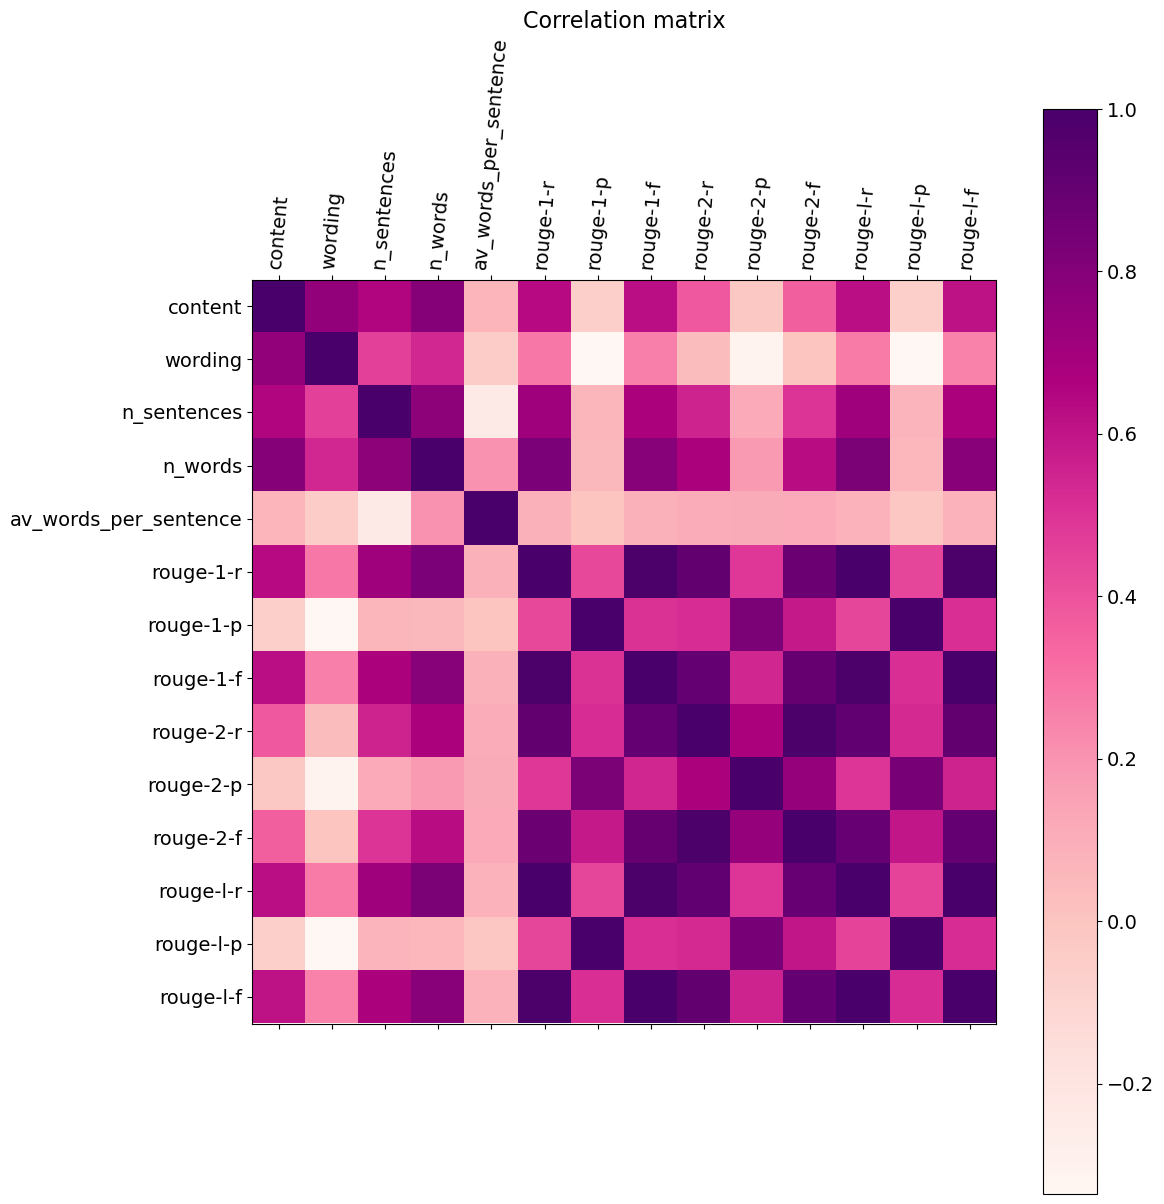

In [33]:
columns = list(summaries_df.select_dtypes(['number']).columns)
tmp_df = summaries_df[columns]

f = plt.figure(figsize=(12, 14))
plt.matshow(tmp_df.corr(), fignum=f.number, cmap="RdPu")
plt.xticks(range(len(columns)), columns, fontsize=14, rotation=85)
plt.yticks(range(len(columns)), columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation matrix", fontsize=16);

In [34]:
# The correlation matrix indicates that number of words and number of sentences in summary is strongly corellated to
# the overal score. In addition to that, f1-rogue metric is strongly correlated with content score
# (correlation coefficient > 0.6) and not-so-strongly with wording score (correlation coefficient > 0.3).

# Conclusion: Statistics concering student summaries together with rogue metric evaluation (all in form of tabular data) 
#  might be used for predicting student score. 

In [35]:
# Correlation Between Content and Wording
# It seems that there is a fairly high positive correlation between wording and content (0.751380).

# There is also a very high correlation between the number of characters in the summary and content but less so with wording.

In [36]:
summaries_df['text_len'] = summaries_df['text'].apply(lambda x: len(x))

In [37]:
summaries_df[['text_len', 'content', 'wording']].corr()

,text_len,content,wording
text_len,1.000000,0.797244,0.540138
content,0.797244,1.000000,0.751380
wording,0.540138,0.751380,1.000000
